<a href="https://colab.research.google.com/github/Abhinay-data/Data-Science-Python-Project/blob/main/Analysis_and_model_imbalenced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection Machine Learning Project**

## Introduction

This project aims to build Machine learning model for detecting anomalies in financial transactions. The dataset has been taken from:

https://www.kaggle.com/datasets/amanalisiddiqui/fraud-detection-dataset/data

Details of columns are:
1. step: denotes a portion of time period
2. type: Type of transaction (PAYMENT/CASH_OUT/DEBIT/TRANSFER etc.)
3. amount: Amount of transaction
4. nameOrig: Name of source account
5. oldbalanceOrg: Old balance of source account
6. newbalanceOrg: New Balance of source account
7. nameDest: Name of target Account
8. oldbalanceDest: Old balance of target account
9. newbalanceDest: New balacne of target account
10. isFraud: 1 for Fraud, 0 for not


## **Exploratory Data Analysis**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [ ]:
df = pd.read_csv("AIML Dataset.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Checking total number of fraud transactions
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
# Checking total number of fraud transactions
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


High discrepancy in *isFraud* vs *isFlaggedFraud*

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
#checking shape
df.shape

(6362620, 11)

In [ ]:
# Percentage of Frauds
round((df['isFraud'].value_counts()[1]/df.shape[0]) *100,2)

np.float64(0.13)

**Highly Imbalanced** dataset. Percentage of Fraud is only **0.13 %**

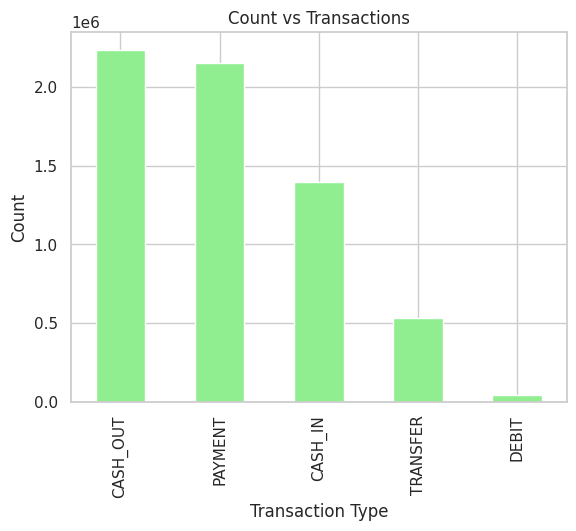

In [ ]:
df['type'].value_counts().plot(kind = 'bar', title= "Count vs Transactions",color= 'lightgreen')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

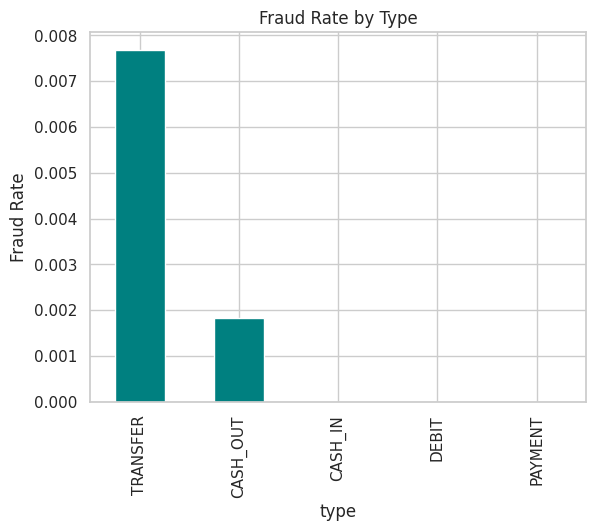

In [ ]:
# Checking for frauds in each type
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar',title='Fraud Rate by Type', color = 'teal')
plt.ylabel('Fraud Rate')
plt.show()


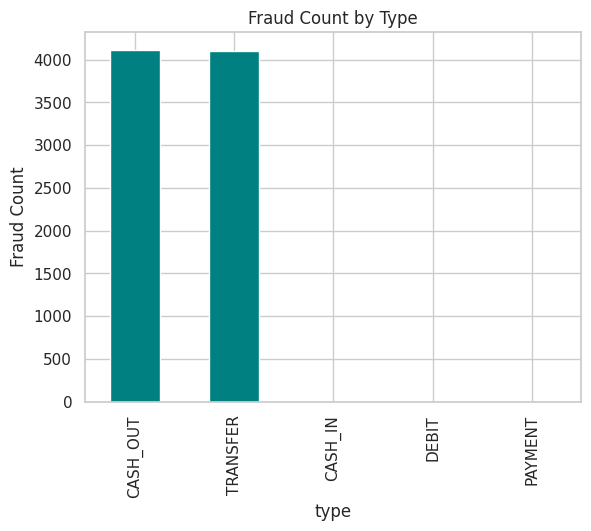

In [ ]:
# Checking for frauds in each type
fraud_by_type_count = df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
fraud_by_type_count.plot(kind='bar',title='Fraud Count by Type', color = 'teal')
plt.ylabel('Fraud Count')
plt.show()

In [ ]:
fraud_by_type

,isFraud
type,
TRANSFER,0.007688
CASH_OUT,0.001840
CASH_IN,0.000000
DEBIT,0.000000
PAYMENT,0.000000


In [ ]:
fraud_by_type_count

,isFraud
type,
CASH_OUT,4116
TRANSFER,4097
CASH_IN,0
DEBIT,0
PAYMENT,0


***Insights:***
1. Fraud rate for **CASH_IN, DEBIT** and **PAYMENT** is **0**
2. Fraud rate for **TRANSFER is highest (0.76%)** .
3. Fraud rate for **CASH_OUT** is **0.18%**

### **Amount** Statistics

In [ ]:
df['amount'].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


<Axes: xlabel='amount', ylabel='Count'>

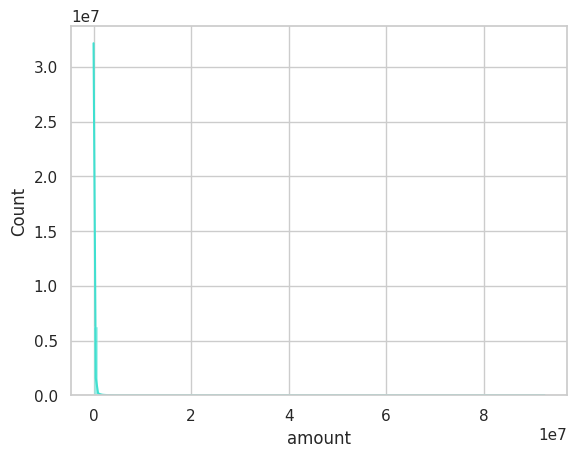

In [ ]:
sns.histplot(df.amount,bins = 100, kde = True, color = 'turquoise')

Presence of outliar as evident from the histogram plot. Using log transfrom for smoother curve:

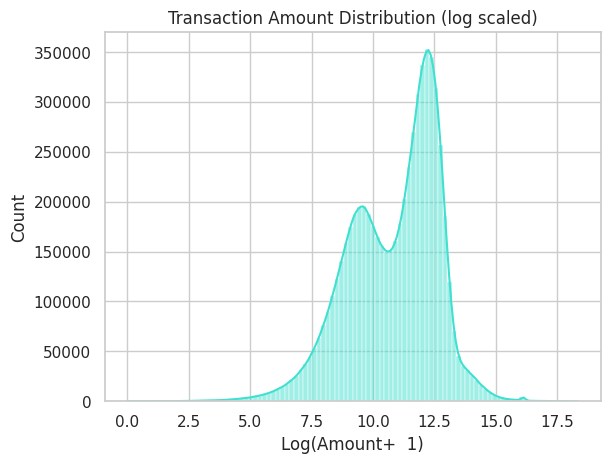

In [ ]:
sns.histplot(np.log1p(df.amount),bins = 100, kde = True, color = 'turquoise')
plt.title("Transaction Amount Distribution (log scaled)")
plt.xlabel("Log(Amount+  1)")
plt.show()


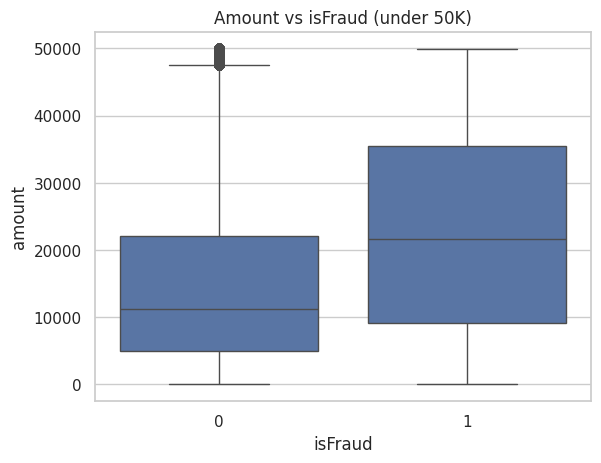

In [ ]:
# Isolating the outliar of 92445516 amount to get a clear representation of the overall dataset
sns.boxplot(data = df[df.amount < 50000], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud (under 50K)")
plt.show()

#### Checking differences in balances for any anomalities

In [ ]:
df['balanceDiffOrig'] = df.oldbalanceOrg - df.newbalanceOrig
df['balanceDiffDest'] = df.newbalanceDest - df.oldbalanceDest


In [ ]:
# Checking for any negetive balances for the original
(df.balanceDiffOrig < 0).sum()

np.int64(1399253)

In [ ]:
(df.balanceDiffDest < 0).sum()

np.int64(1238864)

***Insights:***
1. Maximum value is an outliar
2. Mean is very low as compared to standard deviation
3 Higher mean for isFraud, lower for not

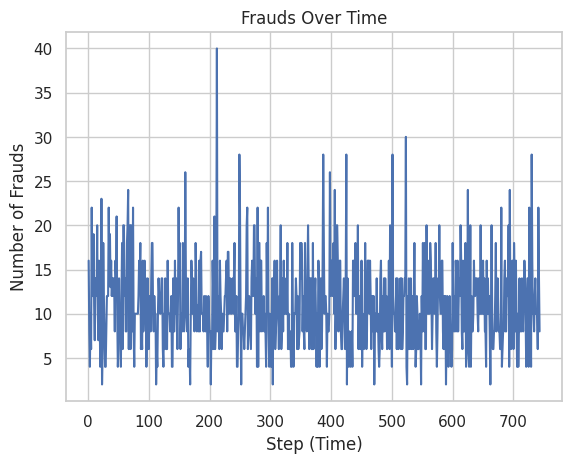

In [ ]:
fraud_per_step = df[df.isFraud == 1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values, label = "Frauds per step")
plt.xlabel('Step (Time)')
plt.ylabel('Number of Frauds')
plt.title('Frauds Over Time')
plt.grid(True)
plt.show()

There does not seem to be any correlation with time, so it is safe to drop the step column for our model

In [ ]:
df.drop(columns='step',inplace=True)

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


### **Customer** wise analysis (Account nuumber wise)

In [ ]:
# Top Senders
top_senders = df.nameOrig.value_counts().head(10)

In [ ]:
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [ ]:
# Top Receivers
top_receivers = df.nameDest.value_counts().head(10)


In [ ]:
top_receivers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


In [ ]:
# Filtering fraud accounts
fraud_accounts_by_origin = df[df.isFraud == 1]["nameOrig"].value_counts().head(10)

In [ ]:
fraud_accounts_by_origin

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C1039979813,1
C2089752665,1
C1614818636,1
C40604503,1


In [ ]:
fraud_accounts_by_dest = df[df.isFraud == 1]["nameDest"].value_counts().head(10)

In [ ]:
fraud_accounts_by_dest

,count
nameDest,
C1981613973,2
C410033330,2
C1366192319,2
C1655359478,2
C803116137,2
C52390890,2
C1325541393,2
C904300960,2
C2020337583,2


Since, the fradulent transactions have been identified only for the transaction types of **TRANSFERS** and **CASH_OUT**, filtering the dataframe based on these types

In [ ]:
fraud_types = df[df.type.isin(["TRANSFER","CASH_OUT"])]

In [ ]:
fraud_types.type.value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


In [ ]:
fraud_types[fraud_types.isFraud == 1].type.value_counts()

,count
type,
CASH_OUT,4116
TRANSFER,4097


Almost similar number of frauds in both TRANSFER and CASH_OUT

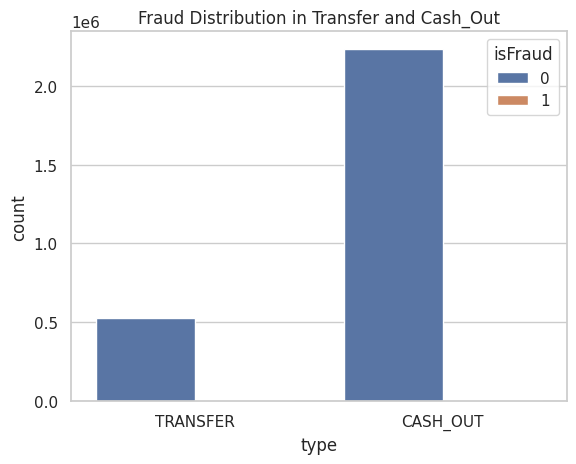

In [ ]:
sns.countplot(data=fraud_types,x="type", hue = 'isFraud')
plt.title("Fraud Distribution in Transfer and Cash_Out")
plt.show()

Dataset is imbalanced hence we are not able to see the fradulent transactions

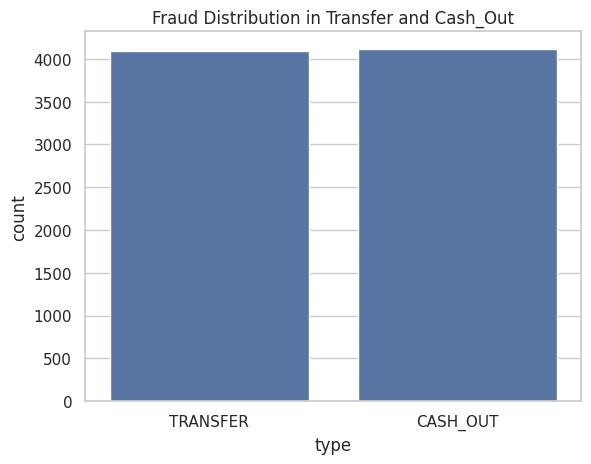

In [ ]:
sns.countplot(data=fraud_types[fraud_types.isFraud == 1],x="type")
plt.title("Fraud Distribution in Transfer and Cash_Out")
plt.show()

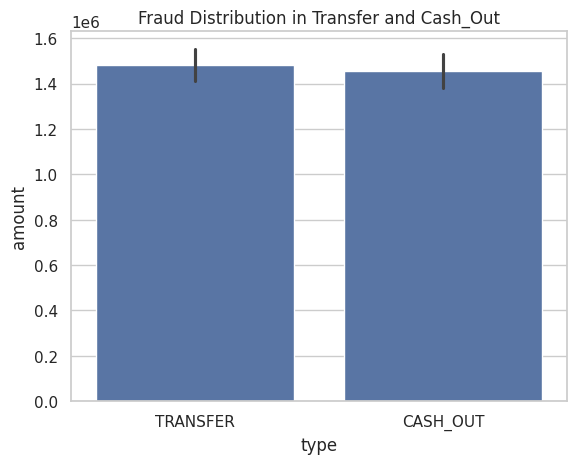

In [ ]:
sns.barplot(data=fraud_types[fraud_types.isFraud == 1],x="type",y='amount',estimator="mean")
plt.title("Fraud Distribution in Transfer and Cash_Out")
plt.show()

In [ ]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


### **Correlation**

In [ ]:
correlation_stats = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [ ]:
correlation_stats

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

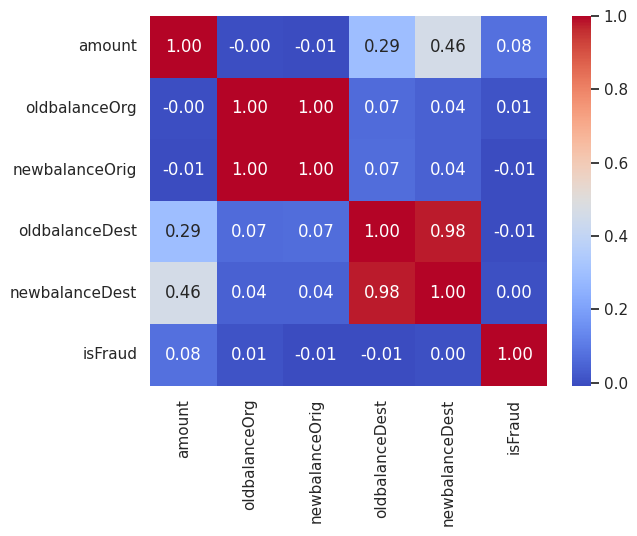

In [ ]:
#visualizing using seaborn
sns.heatmap(correlation_stats,annot=True,cmap = 'coolwarm', fmt = ".2f")

High correlation between oldbalanceDest and newbalanceDest as well as oldbalanceOrg and newBalanceOrig. This is normal, since the money transferred is reflected in either of these features..

There is a correlation of 0.46 between amount and newbalanceDest and a correlation of 0.29 between oldbalanceDest and amount.

In [ ]:
# Filtering accounts where balance = 0 after transfer

zero_after_transfer = df[
    (df.oldbalanceOrg > 0) &
    (df.newbalanceOrig == 0) &
    (df.type.isin(["TRANSFER","CASH_OUT"]))
]

In [ ]:
len(zero_after_transfer)

491678

## **Feature Selection, Feature Engineering and Model Selection**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             precision_recall_curve, roc_curve,
                             classification_report, confusion_matrix)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
df_model = df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis = 1)

In [ ]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [ ]:
categorical = ['type']
numeric = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
y = df_model['isFraud']
X = df_model.drop('isFraud',axis = 1)

In [ ]:
# test_train split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(),numeric),
        ("cat",OneHotEncoder(handle_unknown='ignore',drop='first'),categorical)
    ]
)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight= 'balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight= 'balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight= 'balanced', n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight = 10, use_label_encoder = False, eval_metric = 'logloss',random_state = 42)
}

In [ ]:
smote = SMOTE(sampling_strategy= 0.2, random_state= 42)
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)


Training Logistic Regression with CV...

Training Decision Tree with CV...

Training Random Forest with CV...

Training XGBoost with CV...


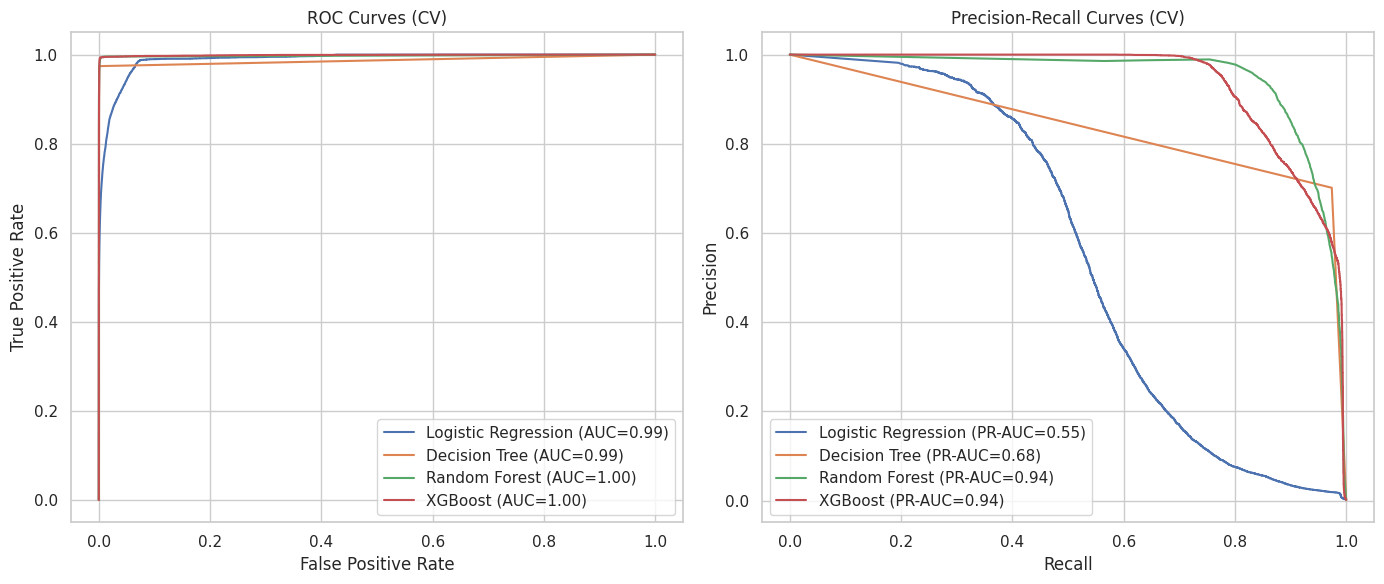


=== Cross-Validation Results on Training Data ===
                 Model  Accuracy (0.5)  Precision (0.5)  Recall (0.5)  \
2        Random Forest        0.999341         0.672866      0.952664   
3              XGBoost        0.997218         0.316169      0.993455   
1        Decision Tree        0.999431         0.701370      0.974125   
0  Logistic Regression        0.945904         0.022260      0.953120   

   F1 (0.5)   ROC-AUC    PR-AUC  Best Threshold  Precision (Best)  \
2  0.788684  0.997656  0.944410           0.920          0.929215   
3  0.479680  0.998876  0.938960           0.998          0.952203   
1  0.815546  0.986794  0.683255           1.000          0.701370   
0  0.043504  0.989092  0.552603           1.000          0.723031   

   Recall (Best)  F1 (Best)  
2       0.863166   0.894974  
3       0.776256   0.855274  
1       0.974125   0.815546  
0       0.476408   0.574365  

✅ Best Model Selected: Random Forest at threshold 0.92

=== Final Test Performance ===

In [ ]:

# Cross-Validation on Training Data
results = []
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title("ROC Curves (CV)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.subplot(1,2,2)
plt.title("Precision-Recall Curves (CV)")
plt.xlabel("Recall")
plt.ylabel("Precision")

for name, model in models.items():
    print(f"\nTraining {name} with CV...")

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', smote),
        ('classifier', model)
    ])

    # Cross-validated predictions (training set only)
    y_proba = cross_val_predict(pipe, X_train, y_train, cv=cv, method='predict_proba')[:,1]
    y_pred = (y_proba >= 0.5).astype(int)

    # Metrics (default threshold=0.5)
    acc = accuracy_score(y_train, y_pred)
    prec = precision_score(y_train, y_pred)
    rec = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_proba)
    pr_auc = average_precision_score(y_train, y_proba)

    # Threshold tuning
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba)
    f1_scores = 2*precisions*recalls / (precisions+recalls+1e-9)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5

    y_pred_best = (y_proba >= best_threshold).astype(int)
    best_prec = precision_score(y_train, y_pred_best)
    best_rec = recall_score(y_train, y_pred_best)
    best_f1 = f1_score(y_train, y_pred_best)

    results.append({
        "Model": name,
        "Accuracy (0.5)": acc,
        "Precision (0.5)": prec,
        "Recall (0.5)": rec,
        "F1 (0.5)": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "Best Threshold": round(best_threshold, 3),
        "Precision (Best)": best_prec,
        "Recall (Best)": best_rec,
        "F1 (Best)": best_f1
    })

    # Plot ROC
    fpr, tpr, _ = roc_curve(y_train, y_proba)
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

    # Plot PR
    plt.subplot(1,2,2)
    plt.plot(recalls, precisions, label=f"{name} (PR-AUC={pr_auc:.2f})")

plt.subplot(1,2,1)
plt.legend()
plt.subplot(1,2,2)
plt.legend()
plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results).sort_values(by="F1 (Best)", ascending=False)
print("\n=== Cross-Validation Results on Training Data ===")
print(results_df)

# Select Best Model + Retrain on Full Training Set

best_model_name = results_df.iloc[0]["Model"]
best_threshold = results_df.iloc[0]["Best Threshold"]

print(f"\n✅ Best Model Selected: {best_model_name} at threshold {best_threshold}")

final_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote),
    ('classifier', models[best_model_name])
])

final_model.fit(X_train, y_train)

# Final Evaluation on Test Set

y_proba_test = final_model.predict_proba(X_test)[:,1]
y_pred_test = (y_proba_test >= best_threshold).astype(int)

print("\n=== Final Test Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_test))
print("PR-AUC:", average_precision_score(y_test, y_proba_test))

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=["Non-Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00   1270881
       Fraud       0.93      0.88      0.90      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.94      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



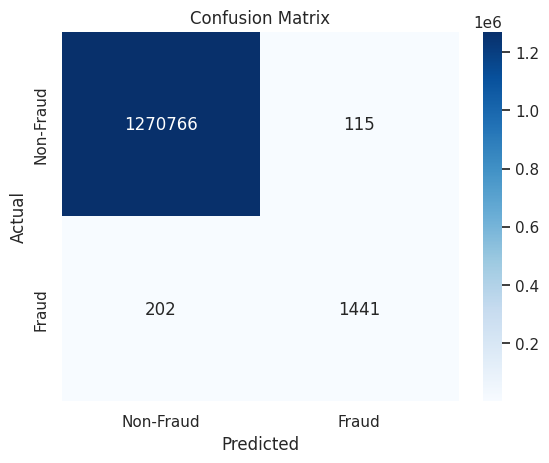

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test, labels=[0,1])

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import joblib

joblib.dump(final_model, "fraud_detection_pipeline.pkl")
joblib.dump(best_threshold, "fraud_threshold.pkl")

['fraud_threshold.pkl']

### Streamlit app for fraud detection

In [ ]:
%%writefile Fraud_Detection_App.py

import streamlit as st
import pandas as pd
import joblib


model = joblib.load("fraud_detection_pipeline.pkl")
threshold = joblib.load("fraud_threshold.pkl")

st.title("Fraud Detection Prediction App")

st.markdown("Please enter the transaction details below and use the predict button")

st.divider()

transation_type = st.selectbox("Transaction Type",["PAYMENT","TRANSFER","CASH_OUT","CASH_IN","DEPOSIT"])
amount = st.number_input("Amount",min_value = 0.0, value = 1000.0)
oldbalanceOrg = st.number_input("Old Balance (Sender)",min_value = 0.0, value = 10000.0)
newbalanceOrig = st.number_input("New Balance (Sender)",min_value = 0.0, value = 9000.0)
oldbalanceDest = st.number_input("Old Balance (Receiver)",min_value = 0.0, value = 0.0)
newbalanceDest = st.number_input("New Balance (Receiver)",min_value = 0.0, value = 0.0)


input_data = pd.DataFrame([{
    "type" : transation_type,
    "amount": amount,
    "oldbalanceOrg": oldbalanceOrg,
    "newbalanceOrig":newbalanceOrig,
    "oldbalanceDest": oldbalanceDest,
    "newbalanceDest":newbalanceDest
}])


if st.button("Predict Fraud"):
    proba = model.predict_proba(input_data)[:,1][0]
    prediction = 1 if proba >= threshold else 0

    st.write(f"**Fraud Probability:** {proba:.3f}")

    if prediction == 1:
        st.error("This transaction is likely FRAUD!")
    else:
        st.success("This transaction seems SAFE.")


Writing Fraud_Detection_App.py


In [ ]:
from pyngrok import ngrok

In [ ]:
ngrok.kill()

In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [ ]:
!streamlit run Fraud_Detection_App.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.209.81:8501

your url is: https://clean-bobcats-wash.loca.lt
FraudDetect
  Stopping...
^C


In [ ]:
!pip install pyngrok cloudflared
!streamlit run app.py &
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.7 MB/s eta 0:00:00
  Created wheel for cloudflared: filename=cloudflared-1.0.0.2-py3-none-any.whl size=2983 sha256=1942a06cf4ce3c4fde6bc3639b0d259285316d8f2ab2162d9230063bc201095b
  Stored in directory: /root/.cache/pip/wheels/5b/ec/09/c3bcd3470be046ec77a9c0cb9d8bb6ceed49c831460878ab0a
Successfully built cloudflared
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
/bin/bash: line 1: cloudflared: command not found
